In [1]:
### Amino acid property analysis ###
# a

# analyze physico-chemical properties (CDR3) of Ig sequences.

# Load required packages
library(alakazam)
library(dplyr)
library(scales)
library(ggplot2)

db <- readChangeoDb("../../changeo_10x/filtered_contig_heavy_germ-pass.tsv", select = NULL, drop = NULL, seq_upper = TRUE)

Loading required package: ggplot2

As of v1.0.0 the AIRR Rearrangement schema is now the default file format.
A description of the standard is available at https://docs.airr-community.org.
The legacy Change-O format is supported through arguments to each function
that allow the input column names to be explicitly defined.


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
### "aminoAcidProperties" function can determine:

# length: total amino acid count
# gravy: grand average of hydrophobicity
# bulkiness: average bulkiness
# polarity: average polarity
# aliphatic: normalized aliphatic index
# charge: normalized net charge
# acidic: acidic side chain residue content
# basic: basic side chain residue content
# aromatic: aromatic side chain content

# calculate all of the available aa properties translated from dna seq in the junction column.
# "trim" option strip off the first and last codon that are the conserved residues before the analysis.

db_cdr3 <- aminoAcidProperties(db, seq="junction", nt=TRUE, trim=TRUE, label="cdr3")

# The full set of properties are calculated by default
dplyr::select(db_cdr3[1:3, ], starts_with("cdr3"))

,cdr3,cdr3_aa_length,cdr3_aa_gravy,cdr3_aa_bulk,cdr3_aa_aliphatic,cdr3_aa_polarity,cdr3_aa_charge,cdr3_aa_basic,cdr3_aa_acidic,cdr3_aa_aromatic
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,GCAAGATCAGACAGCTCAGGCTTTGCTTAC,10,-0.57,11.860,0.20,8.77,-0.001683105,0.1,0.1,0.2
2,GCAAGATTACTGACTTCCTGGTTTGCTTAC,10,0.58,16.482,0.98,7.11,0.998000768,0.1,0.0,0.3
3,GCAAGGGGTAATTACTACGGTCTTGCTTAC,10,-0.53,13.239,0.59,7.98,0.994018189,0.1,0.0,0.3


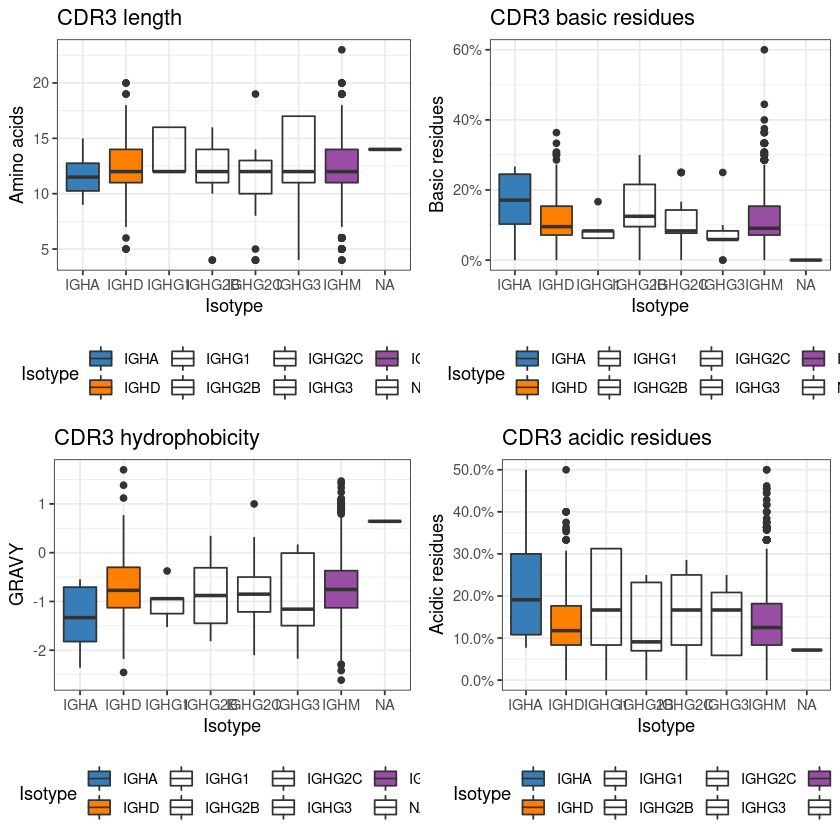

In [3]:
# Define a ggplot theme for all plots
tmp_theme <- theme_bw() + theme(legend.position="bottom")

# Generate plots for all four of the properties
g1 <- ggplot(db_cdr3, aes(x=c_call, y=cdr3_aa_length)) + tmp_theme +
    ggtitle("CDR3 length") + 
    xlab("Isotype") + ylab("Amino acids") +
    scale_fill_manual(name="Isotype", values=IG_COLORS) +
    geom_boxplot(aes(fill=c_call))
g2 <- ggplot(db_cdr3, aes(x=c_call, y=cdr3_aa_gravy)) + tmp_theme + 
    ggtitle("CDR3 hydrophobicity") + 
    xlab("Isotype") + ylab("GRAVY") +
    scale_fill_manual(name="Isotype", values=IG_COLORS) +
    geom_boxplot(aes(fill=c_call))
g3 <- ggplot(db_cdr3, aes(x=c_call, y=cdr3_aa_basic)) + tmp_theme +
    ggtitle("CDR3 basic residues") + 
    xlab("Isotype") + ylab("Basic residues") +
    scale_y_continuous(labels=scales::percent) +
    scale_fill_manual(name="Isotype", values=IG_COLORS) +
    geom_boxplot(aes(fill=c_call))
g4 <- ggplot(db_cdr3, aes(x=c_call, y=cdr3_aa_acidic)) + tmp_theme +
    ggtitle("CDR3 acidic residues") + 
    xlab("Isotype") + ylab("Acidic residues") +
    scale_y_continuous(labels=scales::percent) +
    scale_fill_manual(name="Isotype", values=IG_COLORS) +
    geom_boxplot(aes(fill=c_call))

# Plot in a 2x2 grid
gridPlot(g1, g2, g3, g4, ncol=2)

# need to fix the width size to display the full labels.
# baseTheme(sizing = c("figure", "window"))